## Исследование данных о российском кинопрокате



Необходимо изучить рынок российского кинопроката и выявить текущие тренды и зрительские симпатии. 

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', None)

df1 = pd.read_csv('/datasets/mkrf_movies.csv')  
df2 = pd.read_csv('/datasets/mkrf_shows.csv')

display(df1)
display(df2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


Для дальнейшей работы нужно объединить два датафрейма в один.
По исходным датафремам виднен столбец с уникальными значениями - `puNumber`. Сделаем объединение по нему. 
Однако, необходимо заметить, что в одной строке в первом датафрейме в этом столбце стоит значение `нет`. Скорее всего это означает, что данный фильм не получал прокатное  удостоверение для показа в кинотеатрах, зрители смотрели его через интернет.
Присвоим этому значению 0 и переведём столбец в формат *integer*. После всех манипуляций объединим датафреймы.

In [2]:
df1['puNumber'].where(df1['puNumber'] != 'нет', 0, inplace=True)
df1['puNumber'] = df1['puNumber'].astype('int')
df = df1.merge(df2, on='puNumber', how='outer').copy()
df.rename(columns={'puNumber': 'pu_number'}, inplace=True)
display(df)
df.info()


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Столбец `show_start_date` преобразуем в формат *datetime*

Столбец `age_restriction` преобразуем в формат *integer*

Остальные столбцы или соответствуют своим типам данных, или их преобразование на данный момент невозможно по причине необходимости обработки данных внутри столбцов.

In [3]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], yearfirst = True)

df['age_restriction'] = (
    df['age_restriction']
    .str.extract('(\d+)', expand=False)
    .astype('int64')
)

#### Шаг 2.2. Изучим пропуски в датафрейме


Пропуски в столбцах `director` , `film_studio` и `production_country` можно удалить: очевидно, что работы без студии выполнены частным лицом, а установить личность режиссёров нет возможности. Страну восстановить теоретически можно, но придётся рассматривать каждый пропуск в отдельности и вручную.

Пропуски в столбце `producer` и  можно объяснить тем, что в СССР должности "продюсер" не существовало (был только директор картины). По иностранным фильмам можно сделать предположение, что продюсеры отсутствуют в малобюджетрных картинах, малоизвестных студиях, фильмах жанра "артхаус". Удалять эти пропуски не будем, т.к. можно исказить выборку как минимум по фильмам СССР.

Пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget` , `financing_source` объясняются предельно просто: эти фильмы не спонсировались бюджетом РФ. Удалять или заполнять их не имеет смысла, но можно перевести денежные суммы в млн руб. Столбец `box_office` переведём в тыс.руб, т.к. много фильмов имеют сумму сборов менее миллиона рублей.

Пропуски в столбце `ratings` обусловлены тем, что количество оценок зрителей слишком мало, чтобы выставить среднюю оценку. Удалять их не будем, т.к. это может повлиять на анализ кассовых сборов.

Пропуски в столбце `genres` объяснить трудно. Если они выставляются автоматически системой, то возможен сбой, или жанров слишком много. Если вручную, то можно предположить несохранение изменений при вводе данных, затруднения в выборе жанра и т.д.
Анимационным фильмам можно выставить жанр "мультфильм", остальные пропуски оставим без изменений.

In [4]:
df = df.dropna(subset=['production_country', 'film_studio', 'director'])
money = ['refundable_support', 'nonrefundable_support', 'budget']
for c in money:
    df[c] = round((df[c] / 1000000), 0)

df['box_office'] = round((df['box_office'] / 1000), 2)
df['genres_nan'] = df['genres'].isna()
df['genres'] = df[['type', 'genres_nan', 'genres']].apply(lambda x: 'мультфильм' if (x[0] == 'Анимационный' and x[1] == True) else x[2], axis=1)
df = df.drop(columns='genres_nan')
print(df.isna().mean())
df.info()

title                    0.000000
pu_number                0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.000000
production_country       0.000000
director                 0.000000
producer                 0.075613
age_restriction          0.000000
refundable_support       0.955490
nonrefundable_support    0.955490
budget                   0.955490
financing_source         0.955490
ratings                  0.127095
genres                   0.093712
box_office               0.577021
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7459 non-null   object             
 1   pu_number              7459 non-null   int64              
 2   show_start_date        7459 non-null   datetime64[ns, UTC]
 3   type     

#### Шаг 2.3. Проверка дубликатов в датафрейме

- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [5]:
for col in df.columns:
    print(col)
    print(df[col].duplicated().sum())

print('Количество общих дубликатов:', df.duplicated().sum())

title
713
pu_number
2
show_start_date
5495
type
7451
film_studio
1974
production_country
6509
director
2663
producer
2129
age_restriction
7454
refundable_support
7426
nonrefundable_support
7401
budget
7298
financing_source
7455
ratings
7364
genres
6717
box_office
4568
Количество общих дубликатов: 0


Заметим, что в столбце `title` и `pu_number` есть повторяющиеся фильмы. Т.к. прокатные удостоверения разные, можно предположить, что у некторых фильмов есть ремейки, или же один и тот же фильм офрмлен разными прокатчиками или для разного формата проката.

В столбцах `show_start_date`, `film_studio`, `production_country`, `director`, `producer`, `box_office` дубликаты логичны. Вполне возможно, что несколько фильмов были запущены в прокат в один и тот же день. Также для каждого нового фильма не создаётся новая студия. Про страну и говорить нечего. Режиссёр и продюсер может быть один и тот же в разных фильмах. Кассовые сборы тоже могут совпасть.

Остальные столбцы являются группирующими по какому-либо признаку, без дубликатов там никак :)



#### Шаг 2.4. Изучение категориальных значений


Во всех категориальных столбцах есть общая проблема - неявные дубликаты.

В столбце `type` они появились из-за лишних пробелов, необходимо эти пробелы удалить. 

В столбце `title` тоже есть ненужные пробелы, точки и другие символы. В одной позиции в названии добавлено постановление суда на запрет. Где-то указаны ненужные уточнения.

В столбце `film_studio` есть, дубликаты типа "Мосфильм", "киностудия Мосфильм" и т.д. Т.к. этот столбец не целевой и не принимает участия в исследовании, убирать дубликаты не будем. Аналогичная ситуация со странами в столбце `production_country`: страны могут быть одни и те же, но в разном порядке, есть лишние пробелы.

Аналогичная проблема со столбцами `director` и `producer`: неявные дубликаты обусловлены разной транскрипцией иностранных имён, какие-то имена сокращены, какие-то нет. Где-то ошибочно написаны прописные буквы вместо строчных.

In [6]:
df['type'] = df['type'].str.strip(' ')

#### Шаг 2.5. Проверка количественных значений



---

Рассмотрим столбец `budget`:

count     332.000000
mean      127.201807
std       188.586902
min         0.000000
25%        42.000000
50%        68.500000
75%       142.000000
max      2305.000000
Name: budget, dtype: float64


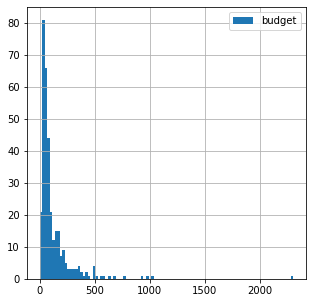

0.0


In [7]:
print(df['budget'].describe())
df['budget'].hist(bins=100, figsize=(5, 5), legend=True)
plt.show()
print(df['budget'].quantile(0.04))

Обратим внимание на максимальные выбросы: казалось бы, что такие значения можно отсечь. Однако, при изучении данных позиций данные значения подтверждаются, это не ошибки. Оставим данные "аномалии", но будем пользоваться медианой по данной выборке.

Также в данной выборке можно заметить 4% фильмов, у которых бюджет равен нулю. Предположительно это связано с ошибкой при выгрузке данных с сайта или отсутствием данных по бюджету изначально (например, коммерческая тайна и т.п.).

---

Похожая ситуация со столбцами `refundable_support` и `nonrefundable_support`. 

count    332.000000
mean      11.864458
std       24.916350
min        0.000000
25%        0.000000
50%        0.000000
75%       15.000000
max      180.000000
Name: refundable_support, dtype: float64
count    332.000000
mean      48.981928
std       59.979954
min        0.000000
25%       25.000000
50%       30.000000
75%       40.500000
max      400.000000
Name: nonrefundable_support, dtype: float64


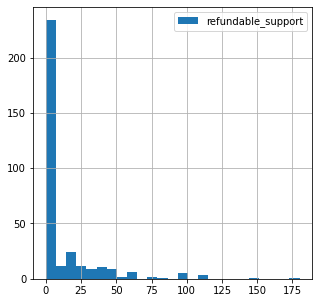

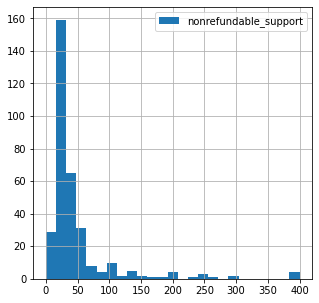

In [8]:
print(df['refundable_support'].describe())
print(df['nonrefundable_support'].describe())

df['refundable_support'].hist(bins=25, figsize=(5, 5), legend=True)
plt.show()
df['nonrefundable_support'].hist(bins=25, figsize=(5, 5), legend=True)
plt.show()

Обратим внимание на большое количество нулевых значений в `refundable_support`. Скорее всего, это говорит о том, что большинство фильмов отбили затраченные на их производство деньги. 

---

Рассмотрим столбец `ratings`: видно, что значения представлены строковым типом. Это связано с тем, что некоторые значения сохранены с символом `%`. Удалим все эти служебные символы, а также приведём все значения к стандартному десятичному типу оценки.

In [9]:
df['ratings'] = (
    df['ratings']
    .str.replace('%', '')
    .astype('float')
)
df['ratings'].where(df['ratings'] < 10.0, df['ratings'] / 10, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7459 non-null   object             
 1   pu_number              7459 non-null   int64              
 2   show_start_date        7459 non-null   datetime64[ns, UTC]
 3   type                   7459 non-null   object             
 4   film_studio            7459 non-null   object             
 5   production_country     7459 non-null   object             
 6   director               7459 non-null   object             
 7   producer               6895 non-null   object             
 8   age_restriction        7459 non-null   int64              
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Рассмотрим столбец `box_office`:

count    3.155000e+03
mean     7.655133e+04
std      2.404559e+05
min      0.000000e+00
25%      8.709500e+01
50%      2.338050e+03
75%      2.399546e+04
max      3.073569e+06
Name: box_office, dtype: float64


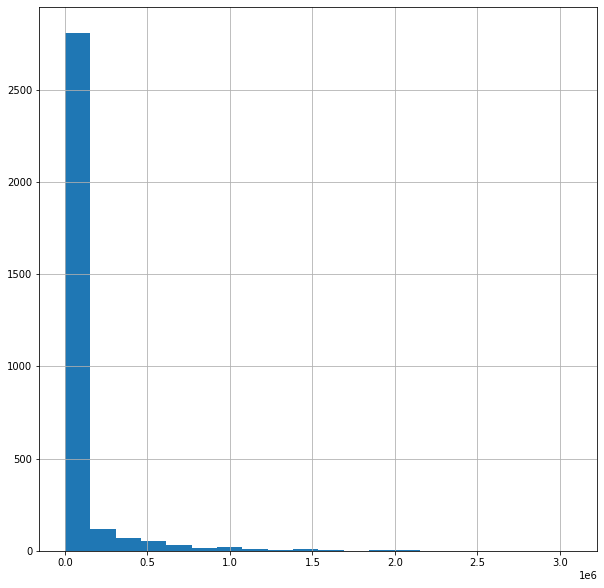

In [10]:
print(df['box_office'].describe())
df['box_office'].hist(bins=20, figsize=(10, 10))
plt.show()

Видно большое количество нулевых значений. Объяснений данному факту может быть несколько:

* фильм не показывали в кинотеатрах;
* при выгрузке датафрейма данные были искажены;
* данные не были указаны изначально.


#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [11]:
df['year'] = df['show_start_date'].dt.year.astype('int')
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.

In [12]:
def first(name):
    df_name = df[name].str.split(',', expand=True)
    df['first_' + name] = df_name[0]
    return df.head()

first('director')
first('genres')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [13]:
df['percent_gov'] = round((df['refundable_support'] + df['nonrefundable_support'])*100 / df['budget'], 0)
import numpy as np
df['percent_gov'].replace([np.inf, -np.inf], 0, inplace=True)
display(df[df['percent_gov'] > 0].head())

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genres,percent_gov
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.0,26.0,79.0,Министерство культуры,8.1,"драма,мелодрама",365.35,2013,А.Атанесян,драма,33.0
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.0,26.0,37.0,Министерство культуры,NaN,NaN,28.14,2014,А.Якимчук,NaN,70.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.0,108.0,176.0,Фонд кино,5.3,"комедия,фантастика",19957.03,2013,Р.Давлетьяров,комедия,61.0
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.0,28.0,41.0,Министерство культуры,4.2,драма,55.92,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,68.0
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.0,25.0,40.0,Министерство культуры,6.4,драма,232.10,2014,М.Угаров,драма,62.0


**В ходе редобработки** данные были объединены в один датафрейм по столбцу с номерами прокатных удостоверений. Была изучена возможная природа появления пропусков. По некоторым столбцам рекомендуется проработать алгоритмы заполнения пропусков (например, по режиссёрам и продюсерам касательно фильмов СССР, рейтингов малопопулярных фильмов, стран.

Также **существует серьёзная проблема с неявными дубликатами:** некоторые фильмы повторяются, где-то есть служебные приписки к названиям, транскрипции иностранных имён различные, а также есть их сокращения. По странам тоже необходима стандартизация. Есть ненужные пробелы в столбце с жанрами. Также рекомендуется очистить данные по киностудиям, оставив только названия.

**С количественными переменными тоже есть проблемы:** есть фильмы, у которых бюджет равен нулю. Предположительно это связано с ошибкой при выгрузке данных с сайта или отсутствием данных по бюджету изначально (например, коммерческая тайна и т.п.). Необходимо проработать заполнение и корректность данных. Столбец ratingsсостоит из различных значений (какие-то сохранены с символом % и не в формате числа с плавающей запятой. Необходимо стандартизировать и автоматизировать систему оценок, т.к. налицо человеческий фактор.

**Дополнительно создали** столбцы с годом премьеры, главным режиссёром, основным жанром и процентом государственной поддержки.

### Шаг 3. Проведём исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. 

count    3131.000000
mean     2015.907697
std         2.429473
min      2010.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2019.000000
Name: year, dtype: float64


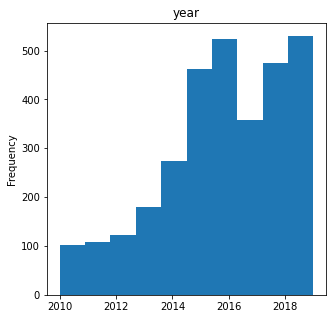

,count,size,share
year,,,
2010,105,980,0.11
2011,109,620,0.18
2012,127,592,0.21
2013,184,629,0.29
2014,279,806,0.35
2015,465,705,0.66
2016,525,817,0.64
2017,357,505,0.71
2018,474,879,0.54


In [14]:
cinema = df.query('box_office > 0').copy()
print(cinema['year'].describe())
cinema['year'].plot(kind='hist', bins=10, figsize=(5, 5), title='year')
plt.show()
percent = df.groupby('year')['box_office'].agg(['count', 'size'])
percent['share'] = round(percent['count'] / percent['size'], 2)
display(percent)

**Наблюдаются высокие темпы роста количества фильмов с рубежа 2014-2015 гг. Можно заметить провал по сборам в 2017 году: это объясняется кризисом в киноиндустрии, большим количеством неудачных фильмов. В то же время, именно по 2017 году данные наиболее полные (71%). Меньше всего информации по 2010 году (11%).**

---

- Изучим, как менялась динамика проката по годам. 

In [15]:
(cinema
 .groupby('year')['box_office']
 .agg(['sum','count'])
 .sort_values('sum', ascending=False)
)

,sum,count
year,,
2018,49668361.90,474
2017,48563707.22,357
2019,48425708.68,530
2016,47866105.18,524
2015,39497365.12,462
2014,7444951.79,273
2013,29799.72,179
2011,14102.75,109
2012,6911.11,122


**По данной сводной таблице можно сделать вывод, что наименьшая сумма сборов была в 2010 году, наибольшая - в 2018 году. Однако, здесь необходимо учитывать вероятное искажение статистики по 2010-2014 годам: количество фильмов с ненулевыми сборами меньше количества в последующие годы в 2-5 раза. Также свою роль могла сыграть ежегодная инфляция.**

---

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

,count,mean,median
year,,,
2010,101,24.046634,1.710
2011,109,129.383028,3.000
2012,122,56.648443,6.110
2013,179,166.478883,3.580
2014,273,27270.885678,20.400
2015,462,85492.132294,5003.450
2016,524,91347.528969,3957.925
2017,357,136032.793333,9968.340
2018,474,104785.573629,8911.535


array([<AxesSubplot:title={'center':'count'}, xlabel='year'>,
       <AxesSubplot:title={'center':'mean'}, xlabel='year'>,
       <AxesSubplot:title={'center':'median'}, xlabel='year'>],
      dtype=object)

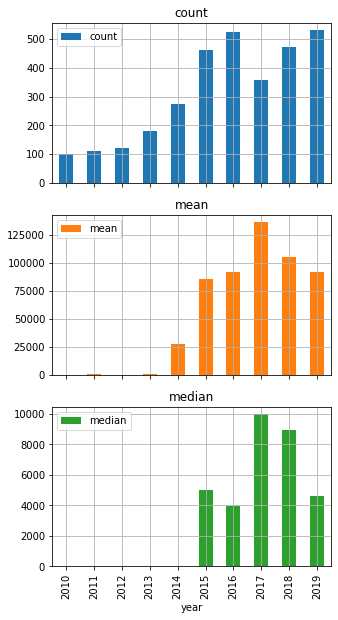

In [16]:
display(cinema
 .groupby('year')['box_office']
 .agg(['count', 'mean', 'median'])
)

(cinema
 .groupby('year')['box_office']
 .agg(['count', 'mean', 'median'])
 .plot(kind='bar', subplots= True, figsize=(5, 10), grid=True,title=['count', 'mean', 'median'])
)

**По данной таблице подтверждается предположение о недостаточной выборке по фильмам с 2010 по 2014 гг.: медианные значения сборов составляют 1,7-6,1 тыс.руб. за фильм! Также очевидна зависимость средних значений от выбросов в данных, необходимо пользоваться медианой.**

---

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Предположим, с чем это может быть связано.

count                              sum               \
year             2015 2016 2017 2018 2019         2015         2016   
age_restriction                                                       
6                  53   70   45   68   81   8701799.37  12053146.00   
12                 72   82   41   66   85  13616082.00  12204446.50   
16                167  181  121  156  178  11368120.88  16664548.57   
18                132  151  147  179  183   5432308.32   6793929.81   

                                                        
year                    2017         2018         2019  
age_restriction                                         
6                12086142.14  10104974.63  12852548.61  
12                7851427.65  14267250.43  12680198.78  
16               18745042.87  16503602.33  12753418.92  
18                9651495.62   8760085.51  10121796.31

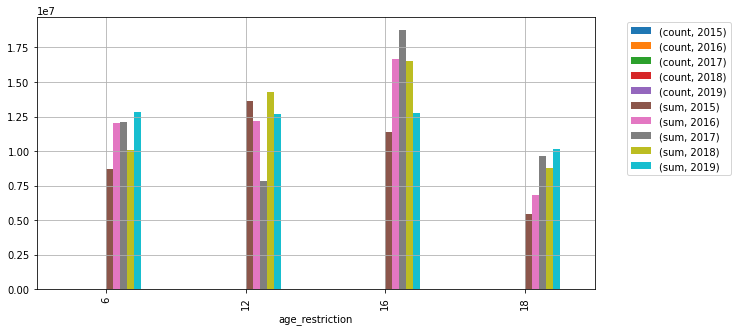

In [17]:
pvt = (cinema
        .query('year in [2015, 2016, 2017, 2018, 2019] and age_restriction in [6, 12, 16, 18]')
        .pivot_table(index='age_restriction', columns='year', values='box_office', aggfunc=['count', 'sum'])
       )

display(pvt)

pvt.plot(kind='bar', grid=True, figsize=(10, 5)).legend(bbox_to_anchor=(1.05, 1), loc='upper left')


**По данному графику видно, что по сборам пальму первенства удерживают фильмы "16+", однако по данной категории есть тенденция на спад популярности. Фильмы "18+" имеют гораздо меньшее распространение и категорию, поэтому сборы по ним ниже. В то же время по ним наблюдается ежегодный восходящий тренд популярности. Фильмы категорий "6+", "12+" по тренду стагнируют, а также имеют высокую волатильность кассовой выручки.**

---

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


count     332.000000
mean      127.201807
std       188.586902
min         0.000000
25%        42.000000
50%        68.500000
75%       142.000000
max      2305.000000
Name: budget, dtype: float64

count    316.000000
mean       6.020886
std        1.148943
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

count    3.180000e+02
mean     1.324324e+05
std      3.348379e+05
min      1.550000e+00
25%      1.236675e+03
50%      1.572007e+04
75%      1.063730e+05
max      3.073569e+06
Name: box_office, dtype: float64

Зависимость box_office от refundable_support
0.31
Зависимость box_office от nonrefundable_support
0.46
Зависимость box_office от budget
0.36
Зависимость box_office от ratings
0.14
Зависимость box_office от box_office
1.0
Зависимость box_office от percent_gov
-0.11
Зависимость ratings от refundable_support
-0.0
Зависимость ratings от nonrefundable_support
0.13
Зависимость ratings от budget
0.09
Зависимость ratings от ratings
1.0
Зависимость ratings от box_office
0.14
Зависимость ratings от percent_gov
-0.0


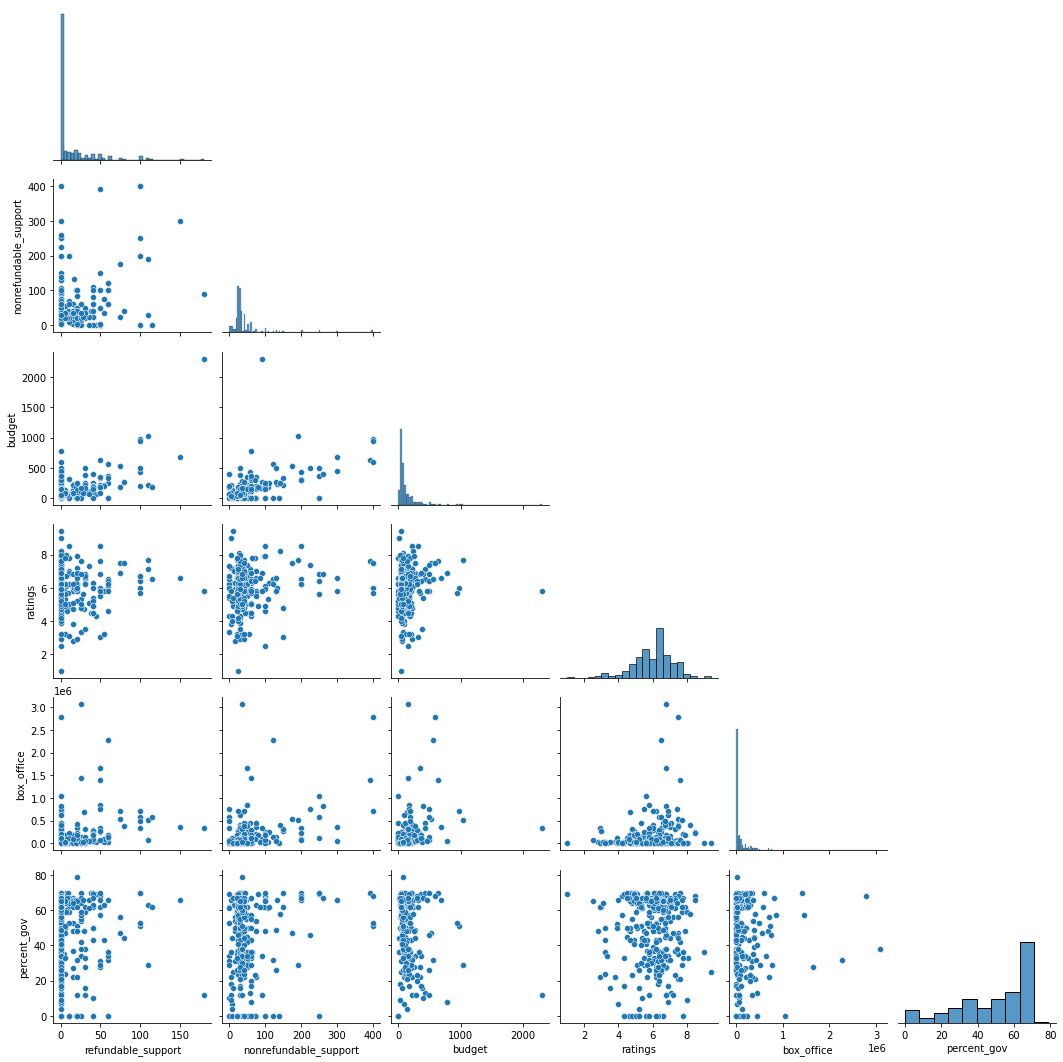

In [18]:
df_gov = df.query('financing_source.notna()').copy()

for d in ['budget', 'ratings', 'box_office']:
    display(df_gov[d].describe())

import seaborn as sns
sns.pairplot(df_gov[['refundable_support', 'nonrefundable_support', \
                     'budget', 'ratings', 'box_office', 'percent_gov']], corner=True)

def correlation(x, y):
    print('Зависимость', x, 'от', y)
    print(round(df_gov[x].corr(df_gov[y]), 2))
    
list_corr = ['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office', 'percent_gov']
for i in list_corr:
    correlation('box_office', i)
for i in list_corr:
    correlation('ratings', i)

При рассмотрении фильмов с господдержкой было выявлено, что кассовые сборы имеют среднюю зависимость от невозвратных затрат (реклама, высокооплачиваемые актёры, возможность снимать в разных местах, технологии и т.д.). По суммарному бюджету и возвратным затратам зависимость ниже средней. Зависимость кассовых сборов от рейтинга, а также от процента господдержки практически не зависит.

В случае с рейтингом выявлена слабая зависимость от невозвратных средств и суммарного бюджета.

**Отсюда можно сделать вывод, что одними лишь вливаниями денег хорошие фильмы вряд ли получатся. Искать проблему нужно в самой продукции, почему она не востребована у зрителя. Особенно это заметно по рейтингам: у 75% картин он ниже 6,7 баллов! Непозволительная халатность в культуре. Подтверждается это и кассовыми сборами: 75% фильмов затрачивают бюджета почти в 1,5 раза больше!**

---

### Шаг 5. Общий вывод

**Описание проекта:**
Заказчик этого исследования — Министерство культуры Российской Федерации. 
Необходимо изучить рынок российского кинопроката и выявить текущие тренды, а также уделить внимание фильмам, которые получили государственную поддержку. 

**Исходные данные:**
В нащем распоряжении два датасета.
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. 

    title — название фильма;
    puNumber — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    type — тип фильма;
    film_studio — студия-производитель;
    production_country — страна-производитель;
    director — режиссёр;
    producer — продюсер;
    age_restriction — возрастная категория;
    refundable_support — объём возвратных средств государственной поддержки;
    nonrefundable_support — объём невозвратных средств государственной поддержки;
    financing_source — источник государственного финансирования;
    budget — общий бюджет фильма;
    ratings — рейтинг фильма на КиноПоиске;
    genres — жанр фильма.
    
Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

    puNumber — номер прокатного удостоверения;
    box_office — сборы в рублях.


В ходе редобработки данные были объединены в один датафрейм по столбцу с номерами прокатных удостоверений. Была изучена возможная природа появления пропусков. По некоторым столбцам рекомендуется проработать алгоритмы заполнения пропусков (например, по режиссёрам и продюсерам касательно фильмов СССР, рейтингов малопопулярных фильмов, стран.

Также существует серьёзная проблема с неявными дубликатами: некоторые фильмы повторяются, где-то есть служебные приписки к названиям, транскрипции иностранных имён различные, а также есть их сокращения. По странам тоже необходима стандартизация. Есть ненужные пробелы в столбце с жанрами. Также рекомендуется очистить данные по киностудиям, оставив только названия.

С количественными переменными тоже есть проблемы: есть фильмы, у которых бюджет равен нулю. Предположительно это связано с ошибкой при выгрузке данных с сайта или отсутствием данных по бюджету изначально (например, коммерческая тайна и т.п.). Необходимо проработать заполнение и корректность данных. Столбец `ratings`состоит из различных значений (какие-то сохранены с символом *%* и не в формате числа с плавающей запятой. Необходимо стандартизировать и автоматизировать систему оценок, т.к. налицо человеческий фактор.

**В ходе исследовательского анализа данных были сделаны следующие выводы:**

Наблюдаются высокие темпы роста количества фильмов с рубежа 2014-2015 гг. Существует провал по сборам в 2017 году: это объясняется кризисом в киноиндустрии, большим количеством неудачных фильмов. В то же время, именно по 2017 году данные наиболее полные (71%). Меньше всего информации по 2010 году (11%).

Наименьшая сумма сборов была в 2010 году, наибольшая - в 2018 году. Однако, здесь необходимо учитывать вероятное искажение статистики по 2010-2014 годам: количество фильмов с ненулевыми сборами меньше количества в последующие годы в 2-5 раза. Также свою роль могла сыграть ежегодная инфляция.

Подтверждается предположение о недостаточной выборке по фильмам с 2010 по 2014 гг.: медианные значения сборов составляют 1,7-6,1 тыс.руб. за фильм! Также очевидна зависимость средних значений от выбросов в данных, необходимо пользоваться медианой.

По сборам пальму первенства удерживают фильмы "16+", однако по данной категории есть тенденция на спад популярности. Фильмы "18+" имеют гораздо меньшее распространение и категорию, поэтому сборы по ним ниже. В то же время по ним наблюдается ежегодный восходящий тренд популярности. Фильмы категорий "6+", "12+" по тренду стагнируют, а также имеют высокую волатильность кассовой выручки.

**При рассмотрении фильмов с господдержкой** было выявлено, что кассовые сборы имеют среднюю зависимость от невозвратных затрат (реклама, высокооплачиваемые актёры, возможность снимать в разных местах, технологии и т.д.). По суммарному бюджету и возвратным затратам зависимость ниже средней. Зависимость кассовых сборов от рейтинга, а также от процента господдержки практически не зависит.

В случае с рейтингом выявлена слабая зависимость от невозвратных средств и суммарного бюджета.

**Отсюда можно сделать вывод, что одними лишь вливаниями денег хорошие фильмы вряд ли получатся. Искать проблему нужно в самой продукции, почему она не востребована у зрителя. Особенно это заметно по рейтингам: у 75% картин он ниже 6,7 баллов! Непозволительная халатность в культуре. Подтверждается это и кассовыми сборами: 75% фильмов затрачивают бюджета почти в 1,5 раза больше!**